# <span style="color:blue"> NSL Exercise lesson 4. </span> 

#### Note: the folder named ex_lesson_04 contains the C++ codes, the input files and another folder named Datas, which in turn contains three other folders named Solid, Liquid and Gas. In each of them you can find the configuration files used for the simulations (old.0 and config.0) plus all the data files needed to draw all the required plots and a file named <font face="Courier">output_g.out</font> which is used in exercise 7.4 of lecture 7.  In order to start the simulation you should copy one input file into input.dat.
 
## <span style="color:red"> Exercise 4.1. </span>

The first exercise requires to improve the given Molecular Dynamics code adding the possibility to restart reading not only an actual spatial configuration [$\vec{r}(t)$] file but also an old spatial configuration [$\vec{r}(t-dt)$]. 

This modification is carried out following the six steps provided in the text: the actual spatial configuration is saved on file <font face="Courier">config.final</font>, while the old one on file <font face="Courier">old.final</font>. Then, using a terminal, all data from file <font face="Courier">config.final</font> are copied to <font face="Courier">config.0</font> and all data from file <font face="Courier">old.final</font> to <font face="Courier">old.0</font>. This operation was repeated five times using $10^4$ time-steps and the results of the equilibration of the thermodynamic phases are shown in the plot below.

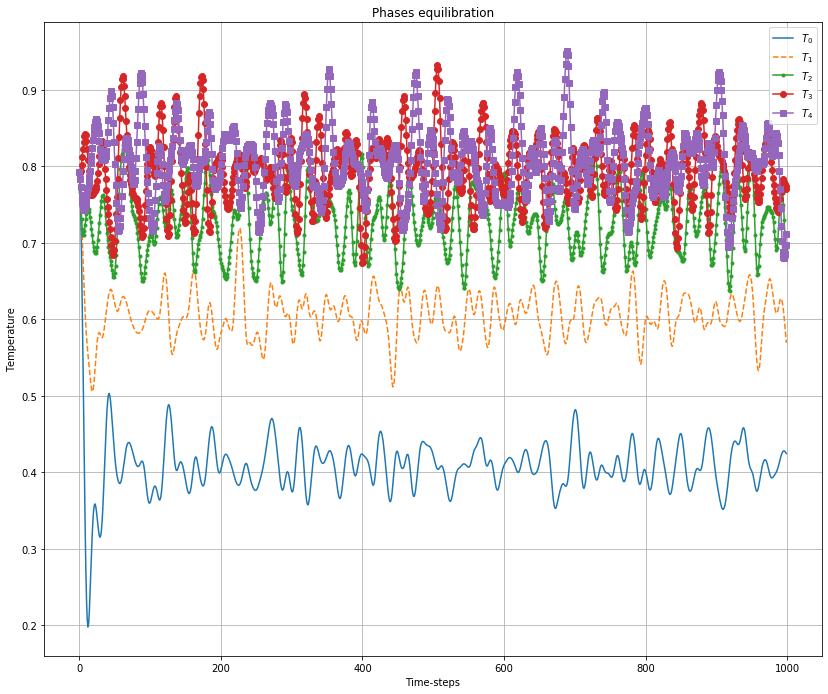

In [1]:
import matplotlib                                 
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,1000,1) 

t0 = np.loadtxt("Datas/Solid/output_temp_1.dat", max_rows=1000)                   #You can change the input path to
t1 = np.loadtxt("Datas/Solid/output_temp_1.dat", skiprows=1000, max_rows=1000)    #../Liquid/output_temp_1.dat or
t2 = np.loadtxt("Datas/Solid/output_temp_1.dat", skiprows=2000, max_rows=1000)    #../Gas/output_temp_1.dat to see the 
t3 = np.loadtxt("Datas/Solid/output_temp_1.dat", skiprows=3000, max_rows=1000)    #same equilibration as for the solid
t4 = np.loadtxt("Datas/Solid/output_temp_1.dat", skiprows=4000)                 

plt.plot(x,t0,label="$T_0$")
plt.plot(x,t1,'--',label="$T_1$")
plt.plot(x,t2,'.-',label="$T_2$")
plt.plot(x,t3,'o-',label="$T_3$")
plt.plot(x,t4,'s-',label="$T_4$")

plt.xlabel('Time-steps')
plt.ylabel('Temperature')
plt.title('Phases equilibration')
plt.grid(True)
plt.legend()

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.3, top=1.7, wspace=0.1, hspace=0.4)

plt.show()  

As you can see the plot above is a bit of a mess. However, it is clear that, as the number of iterations previously described increases, the temperature of our simulation tends to the expected value i.e. $T \to 0.8$ (computed for the fcc solid of the exercise 4.3).

## <span style="color:red"> Exercise 4.2. & 4.3 </span>

Once the equilibration is done, it is requested to implement the blocking method to compute different thermodynamical quantities (Temperaure, Kinetic Energy, Potential Energy and Total Energy per particle) with their uncertainties of a solid, liquid and gaseous phase of Argon, via Lennard-Jones model. Further details of this implementation can be found in the attached C++ code.

In particular, the integration of such quantities is carried out using the following parameters:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

All results are shown using SI units of measure: the Argon parameters used to convert Lennard-Jones units to SI units are $\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu. 

In [3]:
#Physical constants needed for conversions

from scipy.constants import Boltzmann as kb
from scipy.constants import  atomic_mass as amu

sigma = 0.34e-9
epsilon = 120.*kb
m = 39.948*amu

Also, starting configurations of all phases simulations are usually obtained after five preliminar simulations to get equilibrium spatial configurations, using again $10^4$ time-steps.This allows the system to be in a decent neighborhood of the desired temperature of the system (see ex. 4.1). Instead, the blocking method is implemented using $2\cdot10^5$ time-steps divide in $100$ blocks.

##### Solid Phase

In this case, equilibrium configuration is obtained starting from the provided fcc configuration.

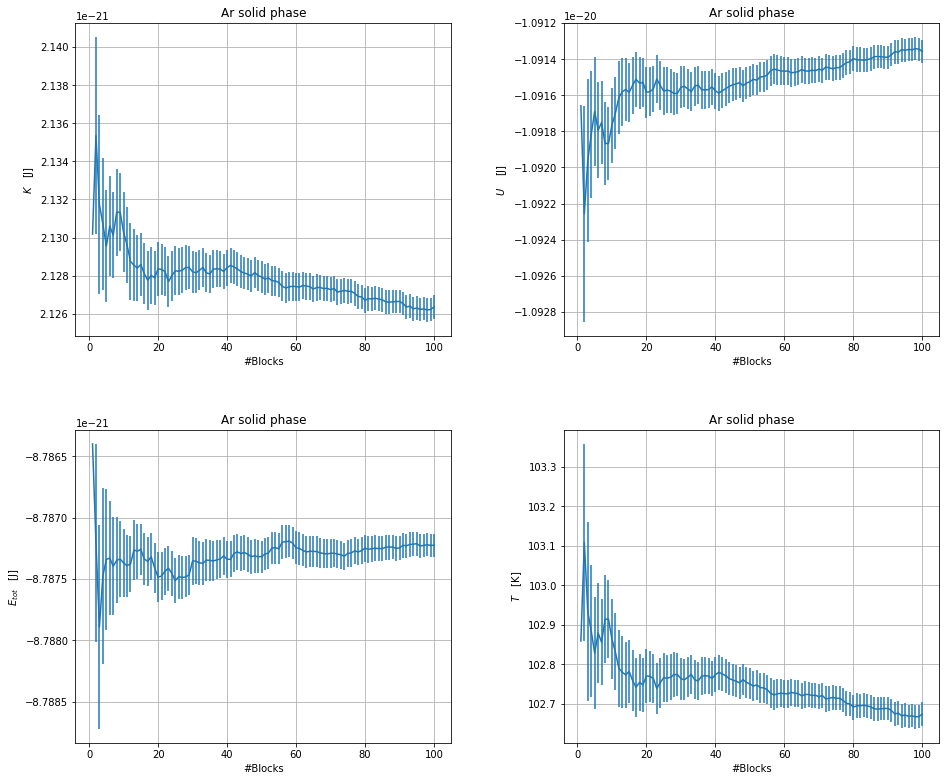

In [6]:
#Loading datas & plots

x, epot, errepot = np.loadtxt("Datas/Solid/ave_epot.out", delimiter="   ", unpack=True)
epot*=epsilon
errepot*=epsilon

ekin , errekin = np.loadtxt("Datas/Solid/ave_ekin.out", usecols=(1,2), delimiter="   ", unpack=True)
ekin*=epsilon
errekin*=epsilon

etot, erretot = np.loadtxt("Datas/Solid/ave_etot.out", usecols=(1,2), delimiter="   ", unpack=True)
etot*=epsilon
erretot*=epsilon

temp, errtemp = np.loadtxt("Datas/Solid/ave_temp.out", usecols=(1,2), delimiter="   ", unpack=True)
temp*=epsilon/kb
errtemp*=epsilon/kb

plt.subplot(2,2,1)               #Kinetic energy
plt.errorbar(x,ekin,errekin)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$K$   [J]")
plt.grid(True)

plt.subplot(2,2,2)               #Potential energy
plt.errorbar(x,epot,errepot)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$U$    [J]")
plt.grid(True)

plt.subplot(2,2,3)               #Total energy
plt.errorbar(x, etot, erretot)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{tot}$   [J]")
plt.grid(True) 

plt.subplot(2,2,4)               #Temperature
plt.errorbar(x,temp,errtemp)
plt.title("Ar solid phase")
plt.xlabel("#Blocks")
plt.ylabel("$T$   [K]")
plt.grid(True)
       
plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.5, top=2, wspace=0.3, hspace=0.3) 

Notice that as expected the total energy is constant and obviously negative, even though it is surely affected by statistical fluctuations.

##### Liquid Phase

In this case, the equilibrium configuration is obtained starting from the last configuration obtained simulating the solid phase.

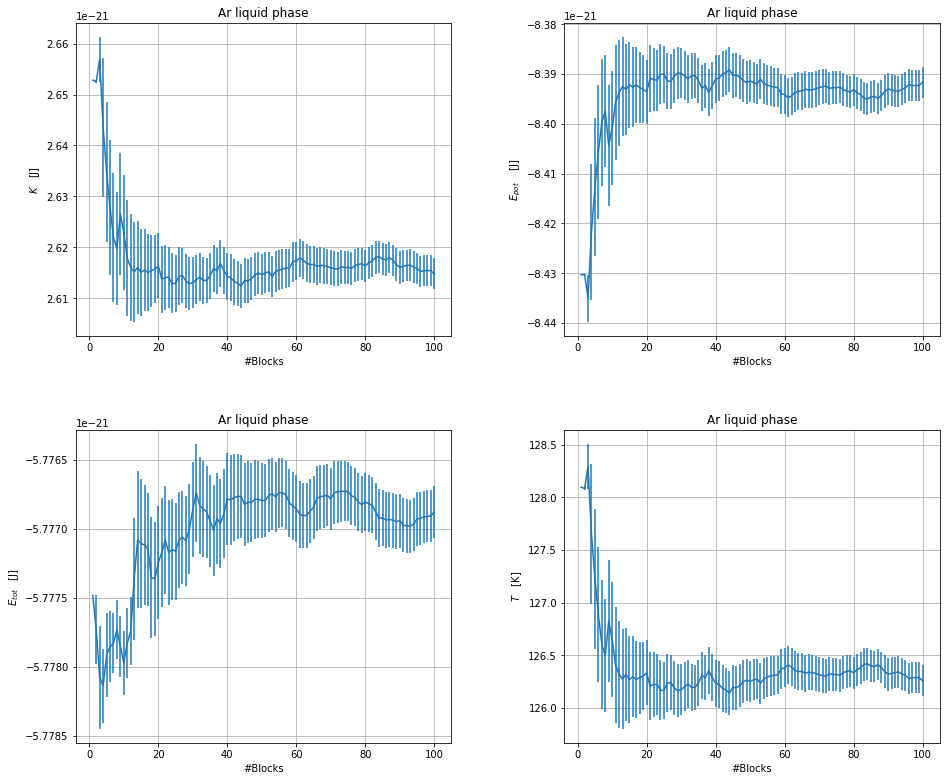

In [8]:
#Loading datas & plots

x, epot, errepot = np.loadtxt("Datas/Liquid/ave_epot.out", delimiter="   ", unpack=True)
epot*=epsilon
errepot*=epsilon

ekin , errekin = np.loadtxt("Datas/Liquid/ave_ekin.out", usecols=(1,2), delimiter="   ", unpack=True)
ekin*=epsilon
errekin*=epsilon

etot, erretot = np.loadtxt("Datas/Liquid/ave_etot.out", usecols=(1,2), delimiter="   ", unpack=True)
etot*=epsilon
erretot*=epsilon

temp, errtemp = np.loadtxt("Datas/Liquid/ave_temp.out", usecols=(1,2), delimiter="   ", unpack=True)
temp*=epsilon/kb
errtemp*=epsilon/kb

plt.subplot(2,2,1)               #Kinetic energy
plt.errorbar(x,ekin,errekin)
plt.title("Ar liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$K$   [J]")
plt.grid(True)

plt.subplot(2,2,2)               #Potential energy
plt.errorbar(x,epot,errepot)
plt.title("Ar liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{pot}$    [J]")
plt.grid(True)

plt.subplot(2,2,3)               #Total energy
plt.errorbar(x, etot, erretot)
plt.title("Ar liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{tot}$   [J]")
plt.grid(True) 

plt.subplot(2,2,4)               #Temperature
plt.errorbar(x,temp,errtemp)
plt.title("Ar liquid phase")
plt.xlabel("#Blocks")
plt.ylabel("$T$   [K]")
plt.grid(True)
       
plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.5, top=2, wspace=0.3, hspace=0.3) 

In this case, we can clearly see that the algorithm doesn't give a "perfect" extimation as in the previous simulation. In fact, you can notice how the total energy of the system is not as constant as before: now it is subject to changes of the order of $mJ$, while previously it was subject to smaller fluctuations.

##### Gas Phase

In this case, the equilibrium configuration is obtained starting from the last configuration obtained simulation the liquid phase.

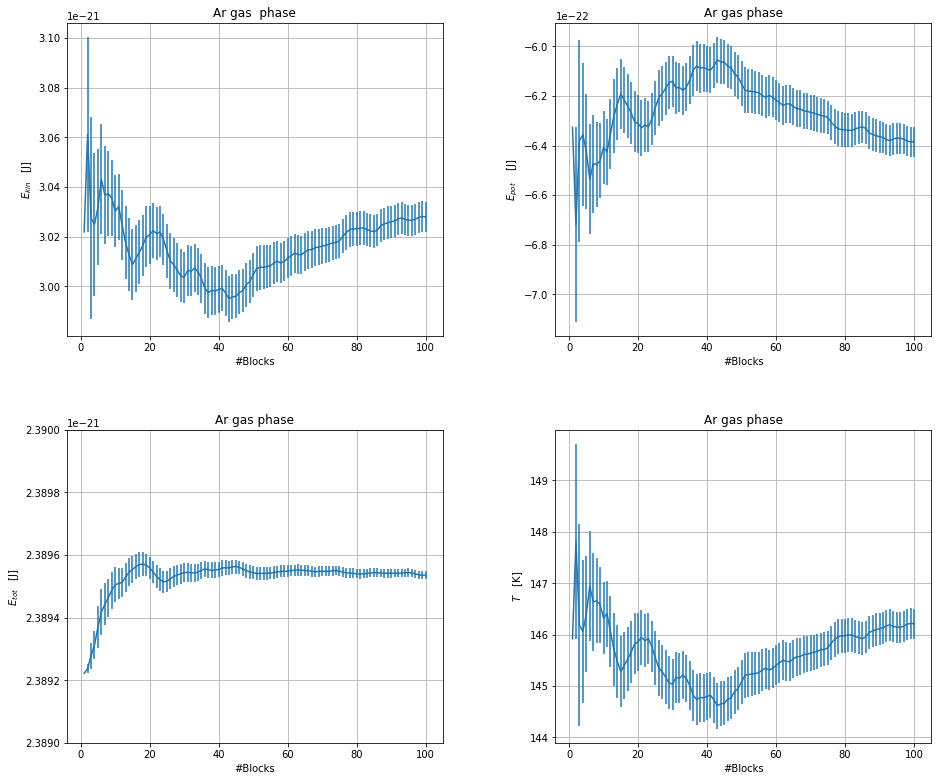

In [23]:
#Loading datas & plots

x, epot, errepot = np.loadtxt("Datas/Gas/ave_epot.out", delimiter="   ", unpack=True)
epot*=epsilon
errepot*=epsilon

ekin , errekin = np.loadtxt("Datas/Gas/ave_ekin.out", usecols=(1,2), delimiter="   ", unpack=True)
ekin*=epsilon
errekin*=epsilon

etot, erretot = np.loadtxt("Datas/Gas/ave_etot.out", usecols=(1,2), delimiter="   ", unpack=True)
etot*=epsilon
erretot*=epsilon

temp, errtemp = np.loadtxt("Datas/Gas/ave_temp.out", usecols=(1,2), delimiter="   ", unpack=True)
temp*=epsilon/kb
errtemp*=epsilon/kb

plt.subplot(2,2,1)                  #Kinetic energy
plt.errorbar(x,ekin,errekin)
plt.title("Ar gas  phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{kin}$   [J]")
plt.grid(True)

plt.subplot(2,2,2)                  #Potential energy
plt.errorbar(x,epot,errepot)
plt.title("Ar gas phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{pot}$    [J]")
plt.grid(True)

plt.subplot(2,2,3)                  #Total energy
plt.errorbar(x, etot, erretot)
plt.title("Ar gas phase")
plt.xlabel("#Blocks")
plt.ylabel("$E_{tot}$   [J]")
plt.ylim([2.389*1e-21,2.390*1e-21])            #You can comment this line to observe the very
plt.grid(True)                                   #small fluctuations of the total energy

plt.subplot(2,2,4)                  #Temperature
plt.errorbar(x,temp,errtemp)
plt.title("Ar gas phase")
plt.xlabel("#Blocks")
plt.ylabel("$T$   [K]")
plt.grid(True)
       
plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.5, top=2, wspace=0.3, hspace=0.3) 

In this case we can say that the algorithm faces its limits and it is no longer able to give us back 'good' extimations that remain constant throughout the simulation, like what we obtained for example for the solid phase. 

Anyway, we can still say that the plot showing $E_{tot}$ confirms the same tendency of all the previous simulations. In fact, you should note from such plot and data files that the values of total energy are changing on a magnitude scale of $100$ $\mu J$ (on a magnitude scale of the order of $10^{-21}$) , i.e. very small fluctuations.